In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/math-problem-categorization/sample_submission.csv
/kaggle/input/math-problem-categorization/train.csv
/kaggle/input/math-problem-categorization/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')
print('Category:', len(train_data.category.unique()))
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

Category: 25


In [3]:
#display limits
pd.set_option('display.max_colwidth', None)
train_data.head()

,problem,category
0,"At a ring toss game at a carnival, Marco throws `8` rings. Some of the rings are worth `5` points, and some are worth `10` points. Marco scores a total of `70` points. How many `5`-point rings and `10`-point rings did Marco toss?",19
1,What is `471 ÷ 100`? Interactive: Students follow steps to create an exploratory area model.,22
2,Follow the directions below to create an equivalent fraction for `1/2` with a denominator of `4`.\n Interactive: Students follow steps to create an exploratory area model.,20
3,Solve the following system by substitution:\n`y=-7x+6`\n`10x+y=0`,14
4,Solve the following system by substitution:\n`-8x+y=0`\n`y=4x+8`,14


In [4]:
train_data.category.dtypes

dtype('int64')

In [5]:
print('traing_data:', len(train_data))
print('test_data:', len(test_data))

traing_data: 250
test_data: 125


In [6]:
for i in range(25):
    print(train_data[train_data['category']==i].head(1))

                                                                                                       problem  \
17  Identify the terms, coefficients, variables, and constants in the following expression:\n`4m + 5 + 2n + 3`   

    category  
17         0  
                                                            problem  category
14  Write an expression to match the phrase: "`n` increased by `8`"         1
                                                                                      problem  \
32  Write an expression to match the phrase:\n''`6` is added to the result of `9` times `d`''   

    category  
32         2  
                                                                                                problem  \
38  Write an algebraic expression to match the phrase below.\n"Increase `d` by `7`, then divide by `5`"   

    category  
38         3  
                                                                                   problem  \
57  Write an expressi

In [7]:
train_data_X = train_data.problem
test_data_X = test_data.problem

In [8]:
X = pd.concat([train_data_X, test_data_X])
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

#download stopwords dict 
nltk.download('stopwords')
nltk.download('punkt')
text = X
text.lower = text.apply(lambda x: x.lower())
stop_words = set(stopwords.words('english'))

#split to sigle words
tokens = text.apply(lambda x: word_tokenize(x))

filtered_tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words])
filtered_tokens = filtered_tokens.apply(lambda x: [word for word in x if word not in string.punctuation])
filtered_tokens = filtered_tokens.apply(lambda x: [word for word in x if word.strip() != ''])

#stemming
stemmer = PorterStemmer()
stemmed_tokens = filtered_tokens.apply(lambda x: [stemmer.stem(word) for word in x])
stemmed_tokens[1]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1                                                                                                               [what, `471, ÷, 100`, interact, student, follow, step, creat, exploratori, area, model]
1    [p, mr, o'har, bought, `18`, pack, pencil, give, student, classroom, there, `p`, pencil, pack, /p, p, how, mani, total, pencil, mrs., o'har, buy, give, class, write, express, use, `18`, `p`, /p]
Name: problem, dtype: object

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(stemmed_tokens)
X_sequence = tokenizer.texts_to_sequences(stemmed_tokens)
X_paded = pad_sequences(X_sequence)
X_paded
y = train_data.category

In [10]:
train_data = X_paded[:250]
test_data = X_paded[250:]
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, y, train_size=0.8, random_state=0)
print(X_train.shape)
print(y_train.shape)

(200, 60)
(200,)


In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import LSTM, Dropout,Dense,Embedding
RandomForest = RandomForestClassifier(random_state=0)
AdaBoost = AdaBoostClassifier(random_state=0)
GradientBoosting = GradientBoostingClassifier(random_state=0)
SVM = LinearSVC(random_state=0)
models = [RandomForest, AdaBoost, SVM]

In [12]:
def accuracy(model):
    for model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print('%s Accuarcy' %model, accuracy_score(pred, y_test))
accuracy(models)

RandomForestClassifier(random_state=0) Accuarcy 0.82
AdaBoostClassifier(random_state=0) Accuarcy 0.12
LinearSVC(random_state=0) Accuarcy 0.3


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from keras.utils import to_categorical
import numpy as np
y_train_encoded = to_categorical(y_train, num_classes=25)
y_test_encoded = to_categorical(y_test, num_classes=25)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=50, input_length=X_train.shape[1]))

# 第一層 LSTM
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))

model.add(Dense(units=25, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded , epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

_, accuracy = model.evaluate(X_test, y_test_encoded)
print('Accuracy:', accuracy)

Epoch 1/10
7/7 [==============================] - 7s 293ms/step - loss: 3.2140 - accuracy: 0.0650 - val_loss: 3.1994 - val_accuracy: 0.1000
Epoch 2/10
7/7 [==============================] - 1s 114ms/step - loss: 3.1584 - accuracy: 0.1250 - val_loss: 3.1208 - val_accuracy: 0.0800
Epoch 3/10
7/7 [==============================] - 1s 109ms/step - loss: 3.0374 - accuracy: 0.1200 - val_loss: 3.0037 - val_accuracy: 0.0800
Epoch 4/10
7/7 [==============================] - 1s 117ms/step - loss: 2.8402 - accuracy: 0.1700 - val_loss: 2.8407 - val_accuracy: 0.0800
Epoch 5/10
7/7 [==============================] - 1s 113ms/step - loss: 2.6799 - accuracy: 0.1600 - val_loss: 2.7121 - val_accuracy: 0.1000
Epoch 6/10
7/7 [==============================] - 1s 113ms/step - loss: 2.5351 - accuracy: 0.2000 - val_loss: 2.6012 - val_accuracy: 0.1400
Epoch 7/10
7/7 [==============================] - 1s 114ms/step - loss: 2.3912 - accuracy: 0.2250 - val_loss: 2.4718 - val_accuracy: 0.1200
Epoch 8/10
7/7 [====

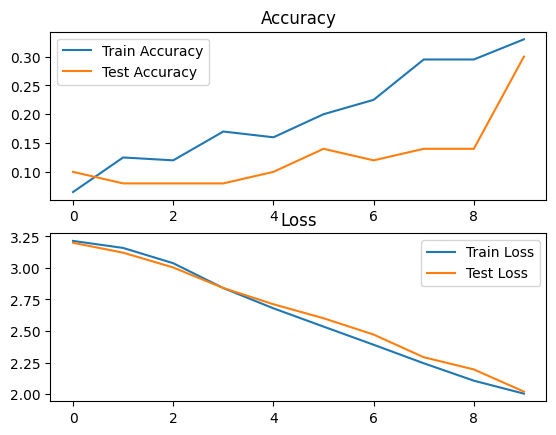

In [14]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.title("Accuracy")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.title("Loss")
plt.legend()
plt.show()

In [15]:
# model.fit(X_paded, y)
# pred = model.predict(test_data)

In [16]:
#submissionall = pd.read_csv('/kaggle/input/math-problem-categorization-data/sample_submission.csv')
#submission.category = pred 
#submission.to_csv('submission.csv', index=False)